# Examining the relationship between 'Money Spent' and 'Matches Won' in the English Premier League
=================================================================================================================
*Michael Black*

---

As somebody who grew up watching American sports, and only recently began to follow European Soccer and the EPL, it has always struck me as odd that there is no salary cap in any of the major European leagues.  Salary caps are designed to level the playing field and give small-market teams the same abilities to retract and retain top-level talent as the more famous and wealthy clubs.

What I wanted to do here was set about exploring the relationship between "Money Spent" and "Matches Won" in the English Premier League.  Is there a clear correlation between spending money and winning matches? (Yes) Have the richest clubs only widened the gap between them and there less-wealthy competitiors over the years? (Also, yes)

None of the results here are particlarly surprising, but they are illuminating of the vast unfairness of the current model in the English Premier League, and just how hard is it to compete without a top-flight budget.

---

In [1]:
# Importing libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import mplcursors
from matplotlib.lines import Line2D

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

> For seasons 2000-2013, I was able to find an [Excel sheet on Reddit](https://www.reddit.com/r/soccer/comments/24z9pg/premier_league_wage_bill_data_since_the_20002001/) containing the wage bill and final league standings for each EPL season.  For simplicity, I copy and pasted each of these into its own sheet in the Excel file and loaded them into their own DataFrames.

In [2]:
df_2000 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2000', index_col = 0)
df_2001 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2001', index_col = 0)
df_2002 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2002', index_col = 0)
df_2003 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2003', index_col = 0)
df_2004 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2004', index_col = 0)
df_2005 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2005', index_col = 0)
df_2006 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2006', index_col = 0)
df_2007 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2007', index_col = 0)
df_2008 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2008', index_col = 0)
df_2009 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2009', index_col = 0)
df_2010 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2010', index_col = 0)
df_2011 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2011', index_col = 0)
df_2012 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2012', index_col = 0)
df_2013 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2013', index_col = 0)

In [3]:
# Example DataFrame

df_2000

,Season Wage Bill (£mil),Final League Standing,Points Gained
2000,,,
MANCHESTER UNITED,50,1,80
ARSENAL,41,2,70
LIVERPOOL,49,3,69
LEEDS UNITED,43,4,68
IPSWICH TOWN,18,5,66
CHELSEA,50,6,61
SUNDERLAND,23,7,57
ASTON VILLA,25,8,54
CHARLTON ATHLETIC,17,9,52


> For seasons 2017-2020 (ending with the current season which just wrapped up last month), I found wage bill data from [Spotrac](https://www.spotrac.com/epl/payroll/) and final standings data from [Sky Sports](https://www.skysports.com/premier-league-table).

In [4]:
# All seasons for which we are obtaining data
seasons = (['2000', '2001', '2002', '2003', '2004',
                 '2005', '2006', '2007', '2008', '2009',
                 '2010', '2011', '2012', '2013', '2017', 
                 '2018', '2019', '2020'])

# Dictionary for each season 2017-2020
d_2017, d_2018, d_2019, d_2020 = {}, {}, {}, {}

> Below, I scrape the two sites listed above for relevant wage bill and standings data for each season.

> When finished, we will have created four new DataFrames with the same name syntax as those above: df_2017, df_2018, etc.

In [5]:
for i in seasons[-4:]:
    
    
#################################################################################################################
#################################################################################################################
    
    
    """
    
    Retrieve payroll information for the 2017/18-2020/21 Premier League seasons.
    
    'team_names' is a list of the 20 teams in the Prem that season.
    
    'team_payroll' is a list of each teams total payroll for that season.
    
    """
    
    payroll_url = "https://www.spotrac.com/epl/payroll/" + i + "/"
    
    r = requests.get(payroll_url, timeout = 10)
    r_html = r.text
    soup = BeautifulSoup(r_html, 'html.parser')
    
    # Searching for table
    payroll_table = soup.find('table')
    
    payroll_length = len(payroll_table.find_all("td"))

    team_names = [payroll_table.find_all("td")[i].text.strip() for i in range(1,payroll_length,9)]
    team_payroll = [payroll_table.find_all("td")[i].text.strip() for i in range(8, payroll_length, 9)]
    
    #Using list comprehension to shorten the wage bills from 8 or 9 digit numbers to 2 or 3
    team_payroll = [i[1:4] if len(i) == 12 else i[1:3] for i in team_payroll]


#################################################################################################################
#################################################################################################################

            
    """
    
    Retrieve Premier League table (standings) for the 2017/18-2020/21 seasons.
    
    'team_name_standings' is a list of the 20 teams in the Prem that season.
    
    'team_standings' is a list of numbers corresponding to where each team finished in the table that season.
    i.e. (1-20)
    
    The reason we get another list of team names (even though we have that above) is because we need to match 
    the list of 'team_standings' to the team names by index.  When we saved it above in the payroll section, 
    the teams weren't listed in order of table finish.
    
    """
    
    standings_url = 'https://www.skysports.com/premier-league-table/' + i

    r = requests.get(standings_url, timeout = 10)
    r_html = r.text
    soup = BeautifulSoup(r_html, 'html.parser')
    
    # Searching for table
    standings_table = soup.find('table')

    standings_length = len(standings_table.find_all("td"))
    
    team_name_standings = [standings_table.find_all("td")[i].text.strip() for i in range(1,standings_length,11)]
    team_standings = [standings_table.find_all("td")[i].text.strip() for i in range(0,standings_length,11)]
    team_points = [standings_table.find_all("td")[i].text.strip() for i in range(9, standings_length, 11)]
    
    
#################################################################################################################
#################################################################################################################
    
    
    """
    
    Adding our payroll and team_name data into a dictionary corresponding to each season.
    
    Then, making a payroll DataFrame from each dict.  We also make a standings DataFrame for each season.
    
    Joining the payroll and standings DataFrames for each season so we are left with 4 DataFrames, 
    one for 2018, 2019, 2020, and 2021.
    
    """
    
    if i == '2017':
        
        # Adding payroll information to dictionary and cleaning data 
        for l, h in zip(team_names, team_payroll):
            d_2017[l.replace(" F.C.", "").replace("&", "and").replace("AFC ", "").replace(" A.F.C.", "")] = [h]
        
        # Payroll DataFrame
        payroll_2017 = pd.DataFrame.from_dict(d_2017, orient = 'index')
        
        # Standings DataFrame
        info_2017 = list(zip(team_name_standings, team_standings, team_points))
        standings_2017 = pd.DataFrame(info_2017).set_index(0)
        standings_2017.index.rename(i, inplace = True)
        
        # Join DataFrames
        df_2017 = payroll_2017.join(standings_2017).rename(columns = {0: 'Season Wage Bill (£mil)', 1: 'Final League Standing', 2: 'Points Gained'})
        df_2017.index.name = int(i)
        df_2017 = df_2017.astype(int)
        df_2017.sort_values('Points Gained', ascending = False, inplace = True)
            
    elif i == '2018':
        
        # Adding payroll information to dictionary and cleaning data
        for l, h in zip(team_names, team_payroll):
            d_2018[l.replace(" F.C.", "").replace("&", "and").replace("AFC ", "").replace(" A.F.C.", "")] = [h]
            
        # For some reason Villa was included though they weren't in the PL in 2018    
        del d_2018['Aston Villa']
        
        # Payroll DataFrame
        payroll_2018 = pd.DataFrame.from_dict(d_2018, orient = 'index')
        
        # Standings DataFrame
        info_2018 = list(zip(team_name_standings, team_standings, team_points))
        standings_2018 = pd.DataFrame(info_2018).set_index(0)
        standings_2018.index.rename(i, inplace = True)
        
        # Join DataFrames
        df_2018 = payroll_2018.join(standings_2018).rename(columns = {0: 'Season Wage Bill (£mil)', 1: 'Final League Standing', 2: 'Points Gained'})
        df_2018.index.name = int(i)
        df_2018 = df_2018.astype(int)
        df_2018.sort_values('Points Gained', ascending = False, inplace = True)
        
    elif i == '2019':
        
        # Adding payroll information to dictionary and cleaning data
        for l, h in zip(team_names, team_payroll):
            d_2019[l.replace(" F.C.", "").replace("&", "and").replace("AFC ", "").replace(" A.F.C.", "")] = [h]
        
        # Payroll DataFrame
        payroll_2019 = pd.DataFrame.from_dict(d_2019, orient = 'index')
        
        # Standings DataFrame
        info_2019 = list(zip(team_name_standings, team_standings, team_points))
        standings_2019 = pd.DataFrame(info_2019).set_index(0)
        standings_2019.index.rename(i, inplace = True)
        
        # Join DataFrames
        df_2019 = payroll_2019.join(standings_2019).rename(columns = {0: 'Season Wage Bill (£mil)', 1: 'Final League Standing', 2: 'Points Gained'}) 
        df_2019.index.name = int(i)
        df_2019 = df_2019.astype(int)
        df_2019.sort_values('Points Gained', ascending = False, inplace = True)

        
    else:
        
        # Adding payroll information to dictionary and cleaning data
        for l, h in zip(team_names, team_payroll):
            d_2020[l.replace(" F.C.", "").replace("&", "and").replace("AFC ", "").replace(" A.F.C.", "")] = [h]
        
        # Payroll DataFrame
        payroll_2020 = pd.DataFrame.from_dict(d_2020, orient = 'index')
        
        # Standings DataFrame
        info_2020 = list(zip(team_name_standings, team_standings, team_points))
        standings_2020 = pd.DataFrame(info_2020).set_index(0)
        standings_2020.index.rename(i, inplace = True)
        
        # Join DataFrames
        df_2020 = (payroll_2020.join(standings_2020).rename(columns = {0: 'Season Wage Bill (£mil)', 1: 'Final League Standing', 2: 'Points Gained'}))
        df_2020.index.name = int(i)
        df_2020 = df_2020.astype(int)
        df_2020.sort_values('Points Gained', ascending = False, inplace = True)
        
        
#################################################################################################################
#################################################################################################################

In [6]:
# Example DataFrame that we just created

df_2020

,Season Wage Bill (£mil),Final League Standing,Points Gained
2020,,,
Manchester City,136,1,86
Manchester United,177,2,74
Liverpool,135,3,69
Chelsea,132,4,67
Leicester City,73,5,66
West Ham United,69,6,65
Tottenham Hotspur,129,7,62
Arsenal,130,8,61
Everton,84,10,59


> Below, I concat all 18 DataFrames into one DF titled 'concatenated'.

> Underneath that, I add a column called 'Team Name' which is just a copy of the DataFrame index.

> Lastly, I create a new column called **'Cursor Info'** - which combines 'Team Name', 'Season Wage Bill (£mil)',
'Final League Standing', and 'Points Gained'.  The reason for this will be more clear below when we make use of our mplcursors function in our live regplot graph, but essentially it is just a visual tool that allows us to extract more data from our graph.

In [7]:
concatenated = (pd.concat([df_2000.assign(dataset='2000'), df_2001.assign(dataset='2001'), 
                           df_2002.assign(dataset='2002'), df_2003.assign(dataset='2003'),
                           df_2004.assign(dataset='2004'), df_2005.assign(dataset='2005'), 
                           df_2006.assign(dataset='2006'), df_2007.assign(dataset='2007'),
                           df_2008.assign(dataset='2008'), df_2009.assign(dataset='2009'), 
                           df_2010.assign(dataset='2010'), df_2011.assign(dataset='2011'),
                           df_2012.assign(dataset='2012'), df_2013.assign(dataset='2013'), 
                           df_2017.assign(dataset='2017'), df_2018.assign(dataset='2018'),
                           df_2019.assign(dataset='2019'), df_2020.assign(dataset='2020')]))

concatenated['Team Name'] = concatenated.index   

concatenated['Cursor Info'] = (concatenated['Team Name']  + 
                       ' | Wages: £' + concatenated['Season Wage Bill (£mil)'].astype(str) + ' mil'
                         + ' | Standing: ' + concatenated['Final League Standing'].astype(str) + 
                       ' | Points: ' + concatenated['Points Gained'].astype(str)) + ' pts'

In [8]:
# Example DataFrame

concatenated

,Season Wage Bill (£mil),Final League Standing,Points Gained,dataset,Team Name,Cursor Info
MANCHESTER UNITED,50,1,80,2000,MANCHESTER UNITED,MANCHESTER UNITED | Wages: £50 mil | Standing: 1 | Points: 80 pts
ARSENAL,41,2,70,2000,ARSENAL,ARSENAL | Wages: £41 mil | Standing: 2 | Points: 70 pts
LIVERPOOL,49,3,69,2000,LIVERPOOL,LIVERPOOL | Wages: £49 mil | Standing: 3 | Points: 69 pts
LEEDS UNITED,43,4,68,2000,LEEDS UNITED,LEEDS UNITED | Wages: £43 mil | Standing: 4 | Points: 68 pts
IPSWICH TOWN,18,5,66,2000,IPSWICH TOWN,IPSWICH TOWN | Wages: £18 mil | Standing: 5 | Points: 66 pts
...,...,...,...,...,...,...
Brighton and Hove Albion,43,16,41,2020,Brighton and Hove Albion,Brighton and Hove Albion | Wages: £43 mil | Standing: 16 | Points: 41 pts
Burnley,35,17,39,2020,Burnley,Burnley | Wages: £35 mil | Standing: 17 | Points: 39 pts
Fulham,43,18,28,2020,Fulham,Fulham | Wages: £43 mil | Standing: 18 | Points: 28 pts
West Bromwich Albion,22,19,26,2020,West Bromwich Albion,West Bromwich Albion | Wages: £22 mil | Standing: 19 | Points: 26 pts


---
## Time to graph!

> %matplotlib notebook is a magic Jupyter command that creates a 'live' graph.  This allows us to zoom in on section of our graph to take a closer look.  More importantly for this use, it **allows our mplcursors function to work.** 

> As you will see below, every time we click on a point in the graph the 'Cursor Info' column relating to that point from our concatenated DataFrame will pop up. I give four examples of this.

> The rest of this cell is graph plotting and legend creating.  **We will call this function each time we want to see the graph of a new EPL season.**

In [47]:
%matplotlib notebook

def plot_it(df_year):

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(13, 12))

    sns.regplot(x = 'Season Wage Bill (£mil)', y = 'Points Gained', data = df_year, marker = 'o',
                color='blue', scatter_kws={'s':70})
    
    plt.xticks(np.arange(0, df_year['Season Wage Bill (£mil)'].max() + 10, 10))
    plt.yticks(np.arange(0, df_year['Points Gained'].max() + 10, 10))
    plt.title(df_year.index.name)
    
    plt.xlim(0, df_year['Season Wage Bill (£mil)'].max() + 10)
    plt.ylim(df_year['Points Gained'].min() - 10, df_year['Points Gained'].max() + 10)
    
    year_in_q = concatenated['dataset'] == str(df_year.index.name)
    
    mplcursors.cursor().connect(
        "add", lambda sel: sel.annotation.set_text(concatenated[year_in_q]['Cursor Info'][sel.target.index]))
    
    
    """
    The following code is all for our graph legend.
    """
        
    d = {}
    d['Average Wage Bill' + (' | £' + str(concatenated[year_in_q]['Season Wage Bill (£mil)'].mean()) + ' mil')] = 'NA'
    d['Average Wage Bill (Top 4)' + ' | £' + str(concatenated[year_in_q].sort_values("Points Gained", ascending = False)[0:4]['Season Wage Bill (£mil)'].mean()) + ' mil'] = 'NA'
    d['Average Wage Bill (Bottom 3)' + ' | £' + str(round(concatenated[year_in_q].sort_values("Points Gained", ascending = False)[-3:]['Season Wage Bill (£mil)'].mean(),2)) + ' mil'] = 'NA'
    d['Average Cost Per Point' + ' | £' + round(concatenated[year_in_q]['Season Wage Bill (£mil)'].sum() / concatenated[year_in_q]['Points Gained'].sum(), 2).astype(str) + ' mil'] = 'NA'

    leg = pd.DataFrame(d, index = [year_in_q])

    custom = [Line2D([], [], marker='.', color='black', linestyle='None'),
             Line2D([], [], marker='.', color='black', linestyle='None'),
             Line2D([], [], marker='.', color='black', linestyle='None'),
             Line2D([], [], marker='.', color='black', linestyle='None')]
    
        
    plt.legend(custom, [i for i in leg], loc = 'lower right', frameon = True)
    leg_gone = plt.gca().get_legend()
    
    counter = 0
    while counter < 4:
        leg_gone.legendHandles[counter].set_visible(True)
        counter += 1
    
    return plt.show()

### Plotting the 2020-2021 EPL Season

<IPython.core.display.Javascript object>


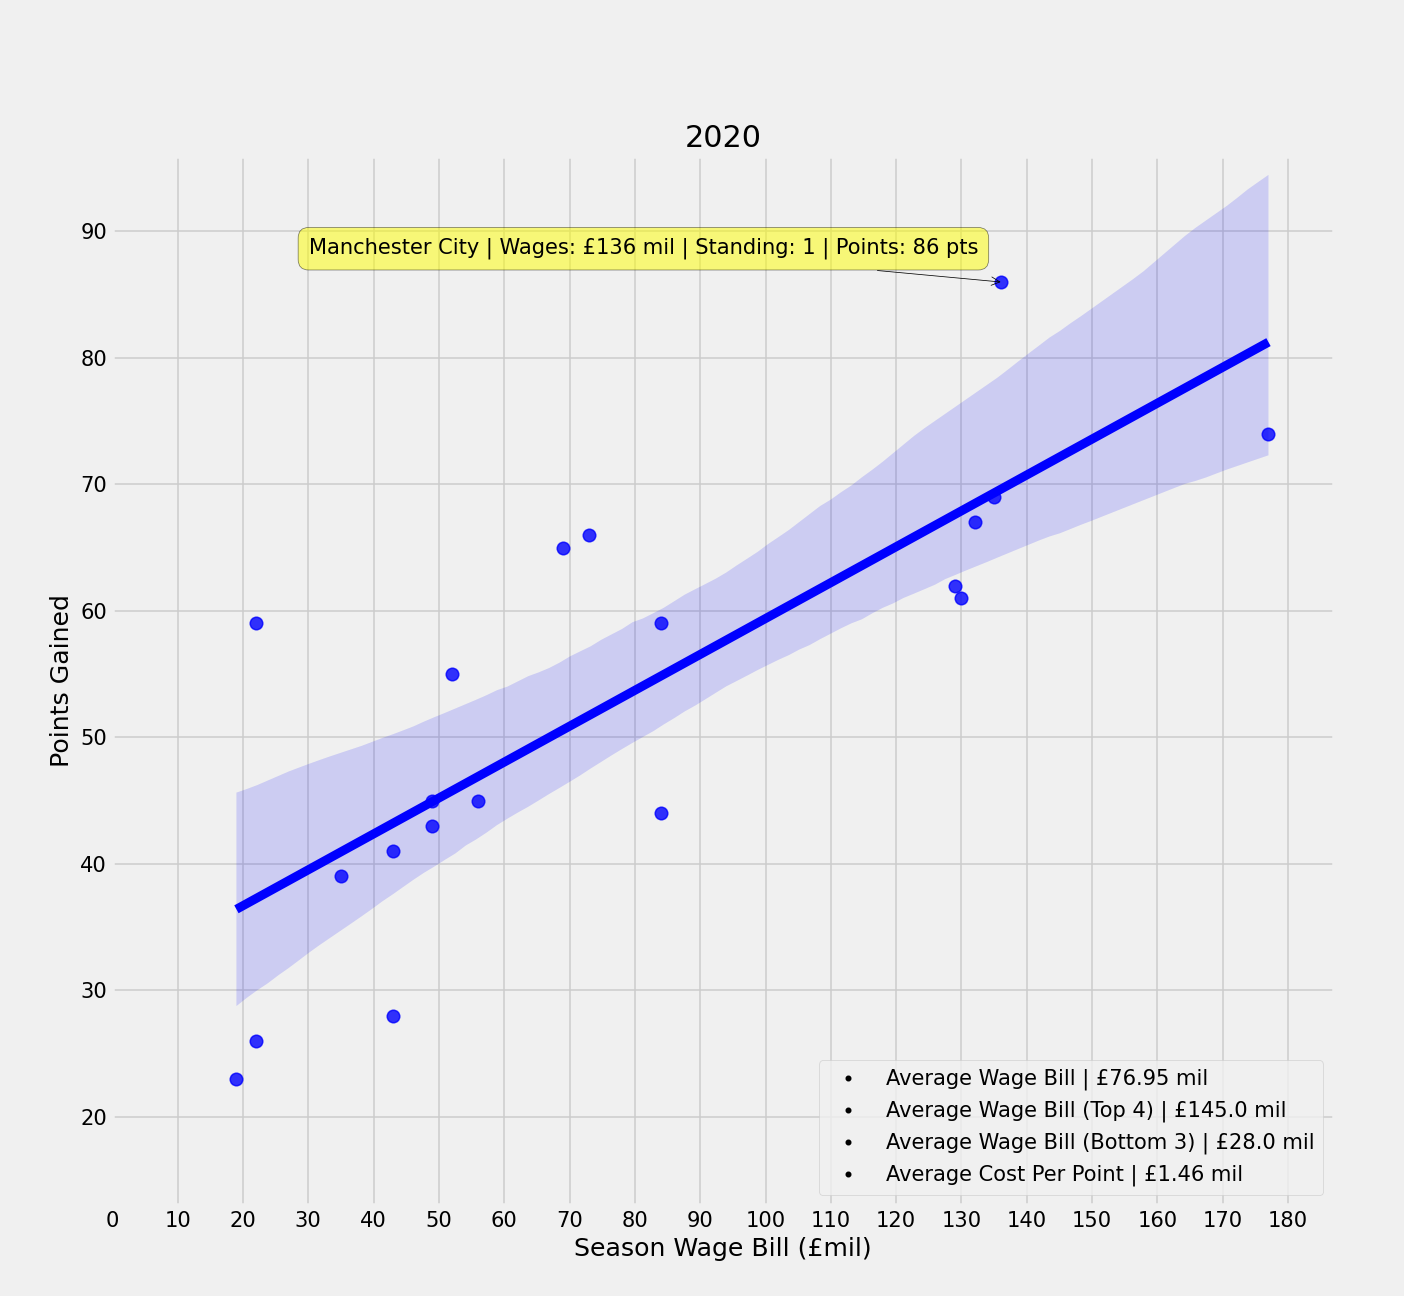

In [48]:
plot_it(df_2020)

### Plotting the 2000-2001 EPL Season

<IPython.core.display.Javascript object>


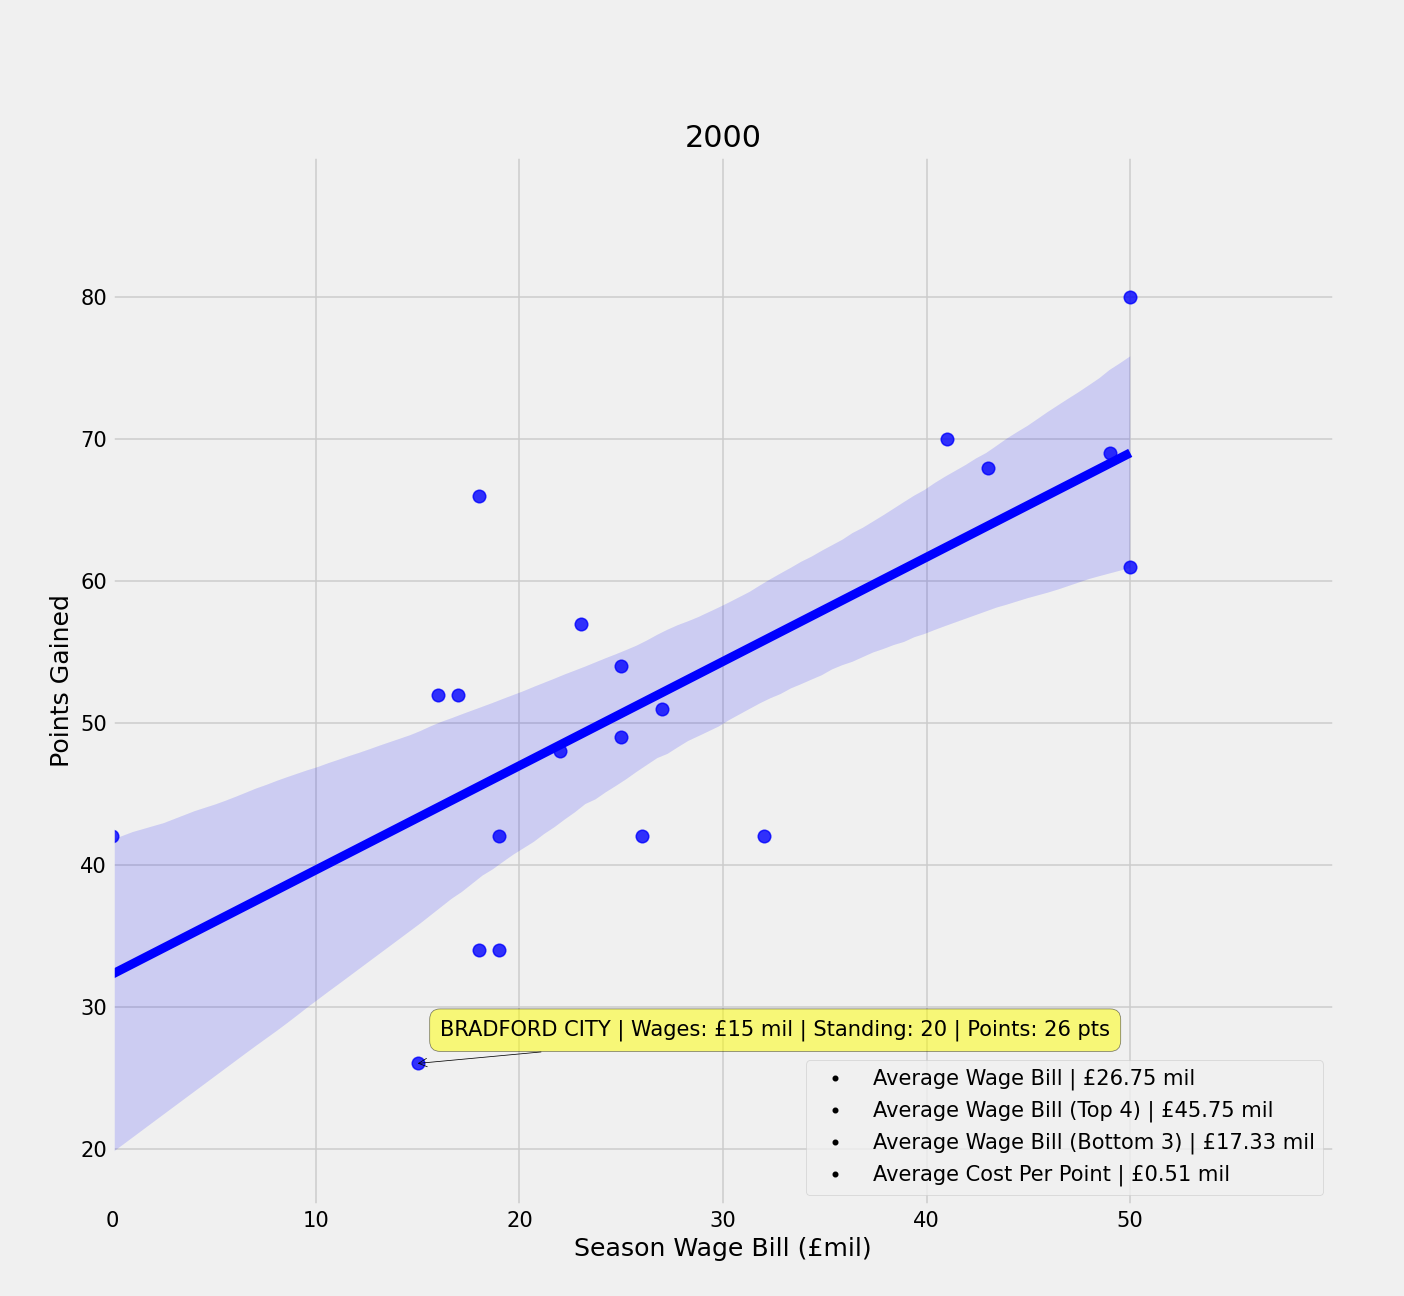

In [49]:
plot_it(df_2000)

### Plotting the 2010-2011 EPL Season

<IPython.core.display.Javascript object>


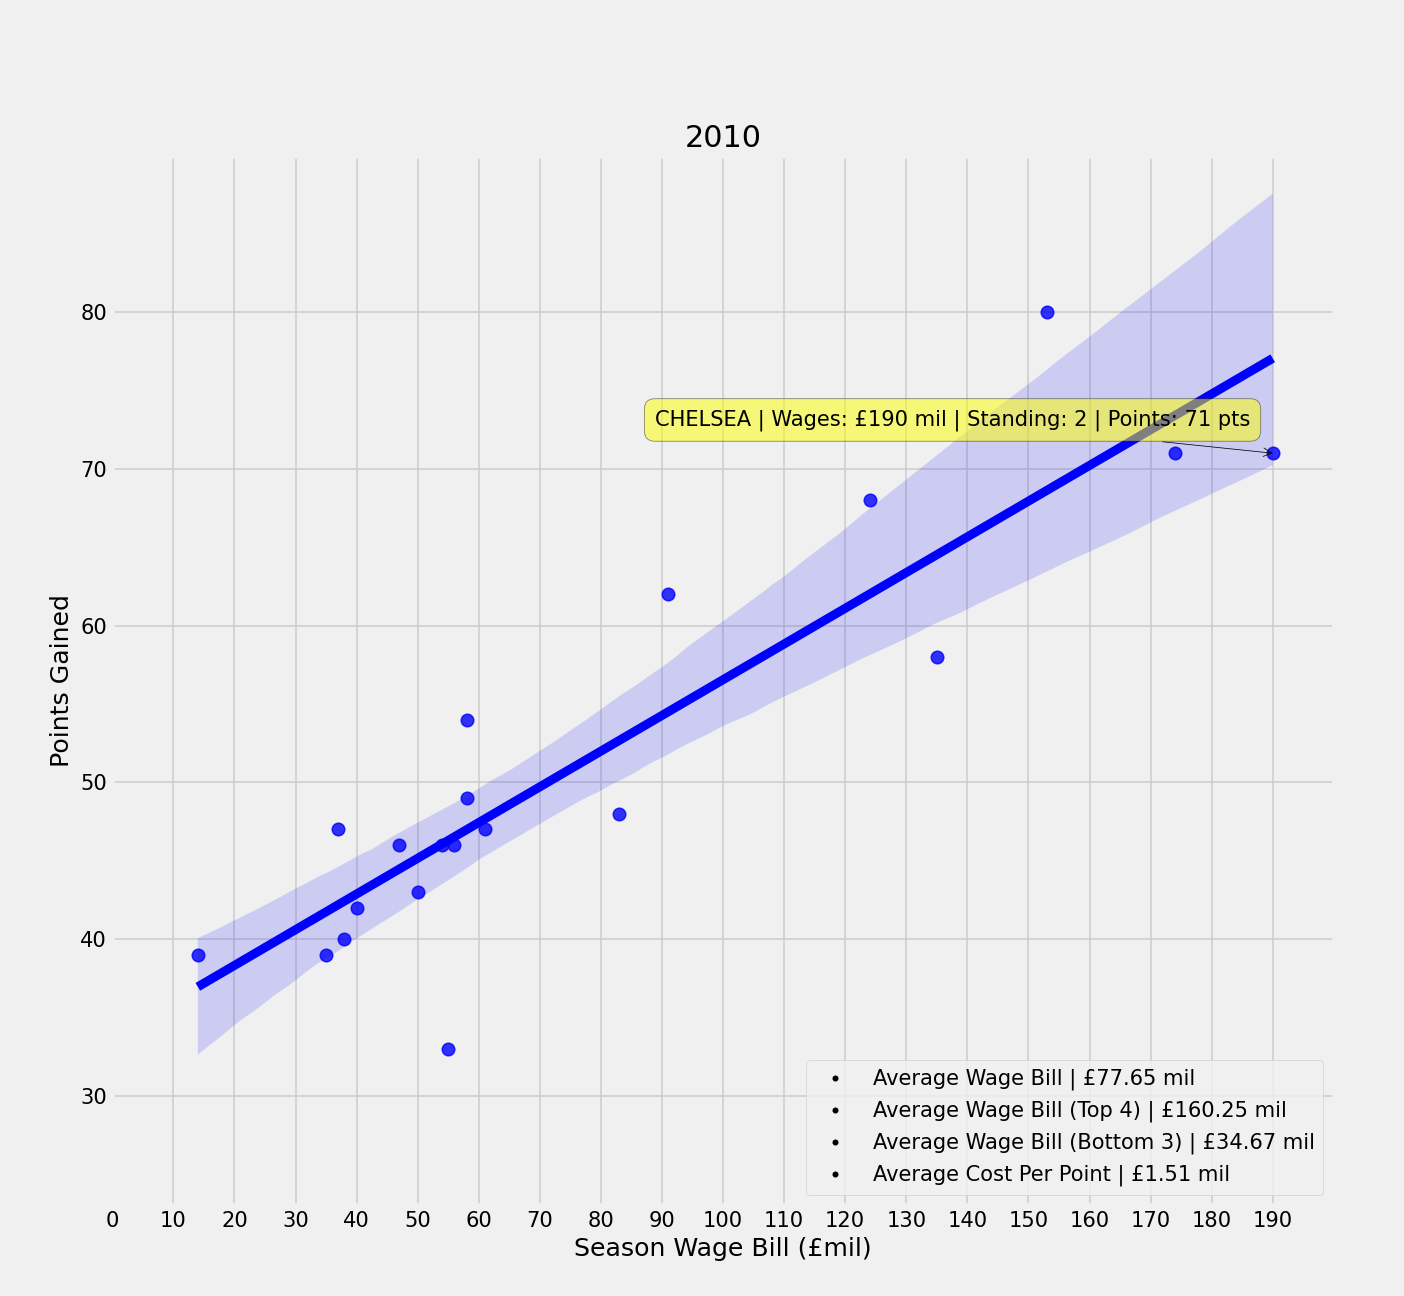

In [50]:
plot_it(df_2010)

### Plotting the 2005-2006 EPL Season

<IPython.core.display.Javascript object>


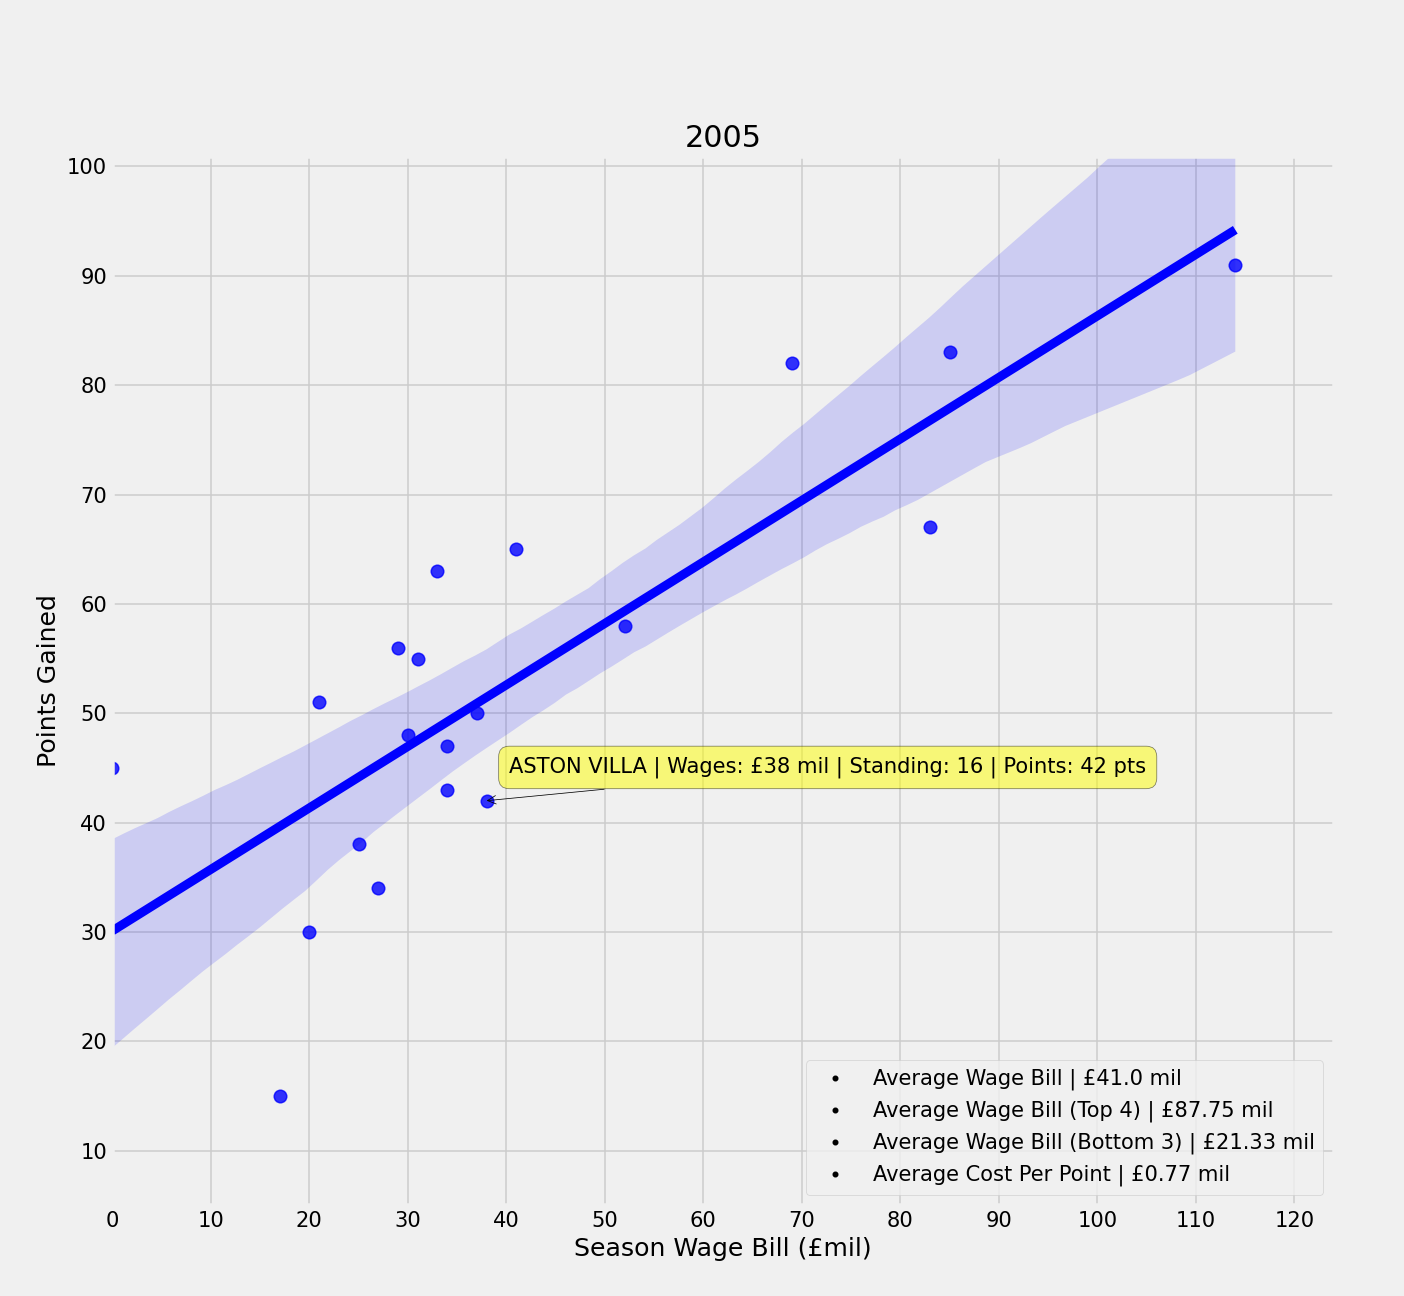

In [51]:
plot_it(df_2005)

---

### Bar chart showing the average wage bill for all teams in the EPL season by season

In [18]:
season_wages = {}
count = 0
count2 = 20

for i in seasons:
    
    season_wages[i] = concatenated[count:count2]['Season Wage Bill (£mil)'].mean()
    
    count += 20
    count2 += 20
    
season_wages_df = (pd.DataFrame.from_dict(season_wages, orient = 'index').
                   rename(columns = {0 : 'Season Wage Bill (£mil)'}))

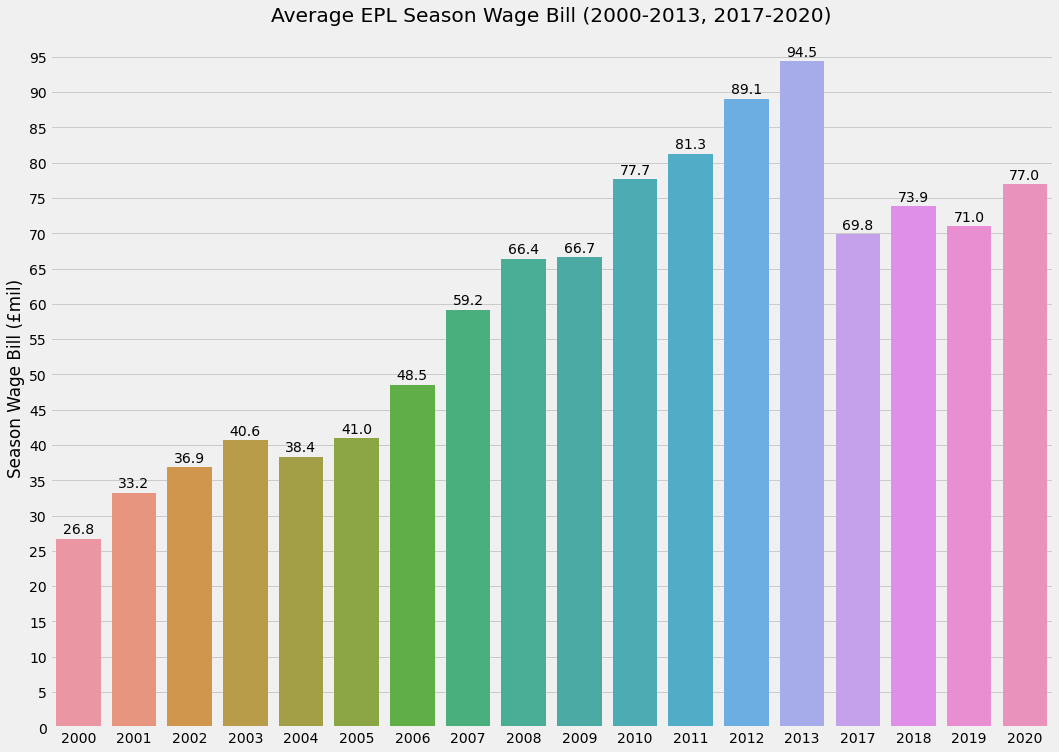

In [23]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = season_wages_df.index, y = 'Season Wage Bill (£mil)', data = season_wages_df)
plt.yticks(np.arange(0, season_wages_df['Season Wage Bill (£mil)'].max() + 5, 5))

plt.title('Average EPL Season Wage Bill (2000-2013, 2017-2020)')
for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
        
plt.show()

---

### Bar chart showing the average wage bills for Top 4 teams in the EPL season by season

In [24]:
top4_wages = {}
count = 0
count2 = 4

for i in seasons:
    
    top4_wages[i] = concatenated[count:count2]['Season Wage Bill (£mil)'].mean()
    
    count += 20
    count2 += 20
    
top4_wages_df = (pd.DataFrame.from_dict(top4_wages, orient = 'index').
                   rename(columns = {0 : 'Season Wage Bill (£mil)'}))

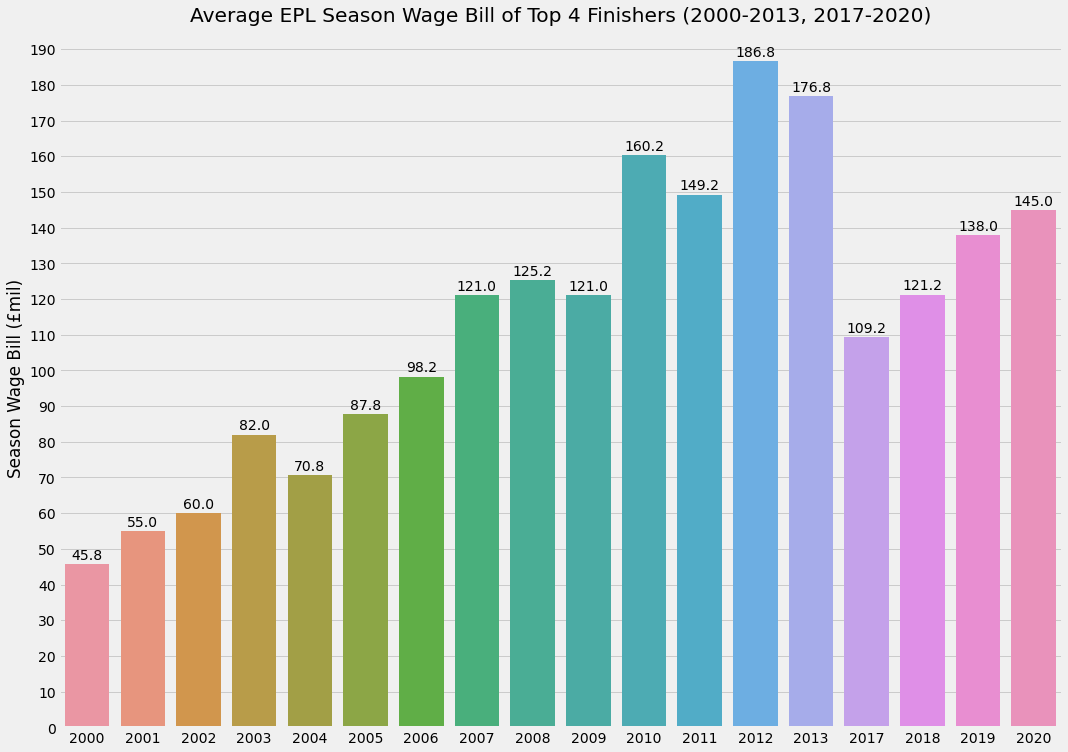

In [25]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = top4_wages_df.index, y = 'Season Wage Bill (£mil)', data = top4_wages_df)

plt.yticks(np.arange(0, top4_wages_df['Season Wage Bill (£mil)'].max() + 10, 10))

plt.title('Average EPL Season Wage Bill of Top 4 Finishers (2000-2013, 2017-2020)')

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

---

### Bar chart showing the average wage bills for Bottom 3 teams in the EPL season by season

In [26]:
bottom3_wages = {}
count = 17
count2 = 20

for i in seasons:
    
    bottom3_wages[i] = round(concatenated[count:count2]['Season Wage Bill (£mil)'].mean(), 2)
    
    count += 20
    count2 += 20
    
bottom3_wages_df = (pd.DataFrame.from_dict(bottom3_wages, orient = 'index').
                   rename(columns = {0 : 'Season Wage Bill (£mil)'}))

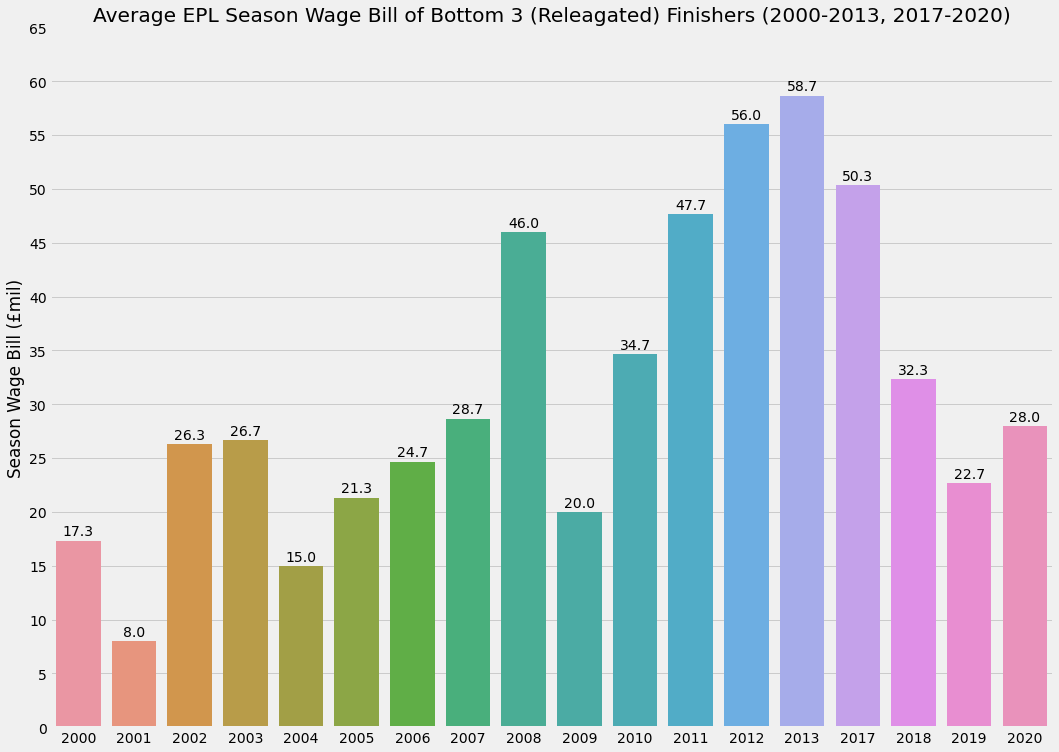

In [27]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = top4_wages_df.index, y = 'Season Wage Bill (£mil)', data = bottom3_wages_df)

plt.yticks(np.arange(0, bottom3_wages_df['Season Wage Bill (£mil)'].max() + 10, 5))

plt.title('Average EPL Season Wage Bill of Bottom 3 (Releagated) Finishers (2000-2013, 2017-2020)')

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

---

### Comparing the spending habits of the Top 4 teams by the Bottom 3 teams season by season

In [79]:
comparison = top4_wages_df.join(bottom3_wages_df, how = 'left', lsuffix=' Top 4', rsuffix=' Bottom 3')
comparison.rename(columns = {"Season Wage Bill (£mil) Top 4" : "Top 4", "Season Wage Bill (£mil) Bottom 3": "Bottom 3"}, inplace = True)
comparison['Difference'] = comparison['Top 4'] - comparison['Bottom 3']

comparison

,Top 4,Bottom 3,Difference
2000,45.75,17.33,28.42
2001,55.00,8.00,47.00
2002,60.00,26.33,33.67
2003,82.00,26.67,55.33
2004,70.75,15.00,55.75
2005,87.75,21.33,66.42
2006,98.25,24.67,73.58
2007,121.00,28.67,92.33
2008,125.25,46.00,79.25
2009,121.00,20.00,101.00


> This DataFrame shows very clearly the vast gulf in spending between the clubs at the top of the Prem and those at the bottom.

### Bar chart showing the growth from the "Difference" column in the DataFrame above

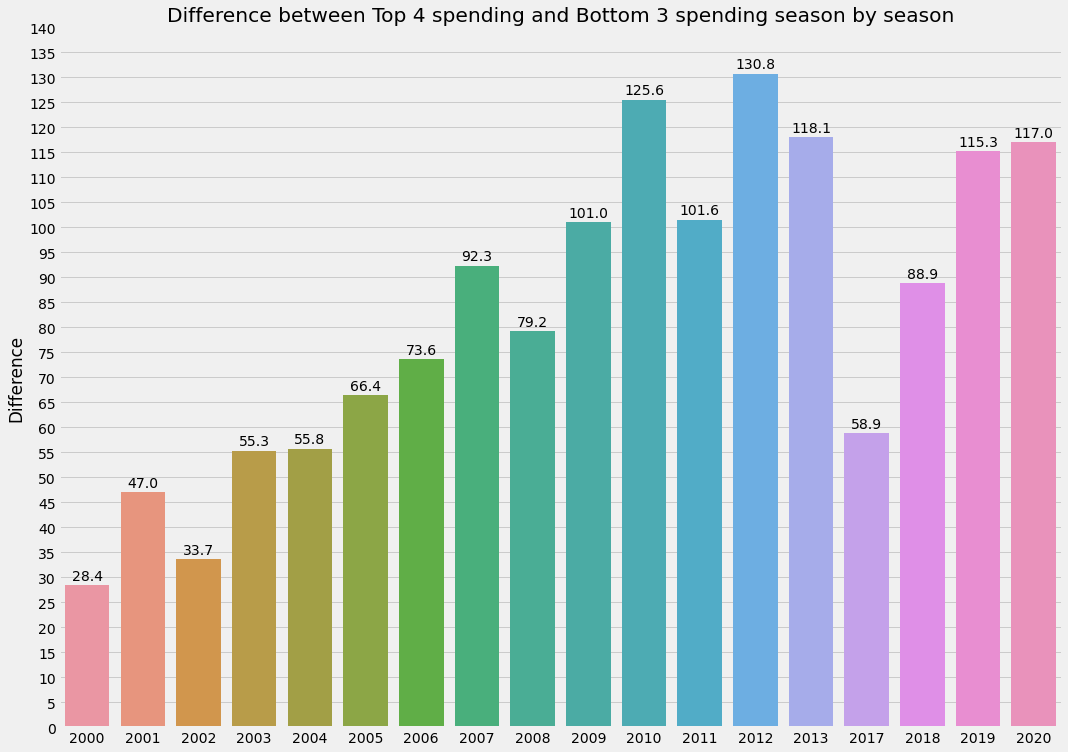

In [80]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = comparison.index, y = 'Difference', data = comparison)

plt.yticks(np.arange(0, comparison['Difference'].max() + 10, 5))

plt.title('Difference between Top 4 spending and Bottom 3 spending season by season')

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

> What was once a pretty tight gap has become a seismic gulf seperating the "haves" and "have nots".  In the 2020-2021 season, **Top 4 teams spent an average of £117 million more than the Bottom 3 teams.**

### Bar chart showing the average 'cost per point' season by season in the EPL

In [76]:
cost_per_point = {}
count = 0
count2 = 20

for i in seasons:
    
    cost_per_point[i] = round(concatenated[count:count2]['Season Wage Bill (£mil)'].sum() / concatenated[count:count2]['Points Gained'].sum(), 2)
    
    count += 20
    count2 += 20
    
cost_per_point_df = (pd.DataFrame.from_dict(cost_per_point, orient = 'index').
                   rename(columns = {0 : 'Cost Per Point (£mil)'}))

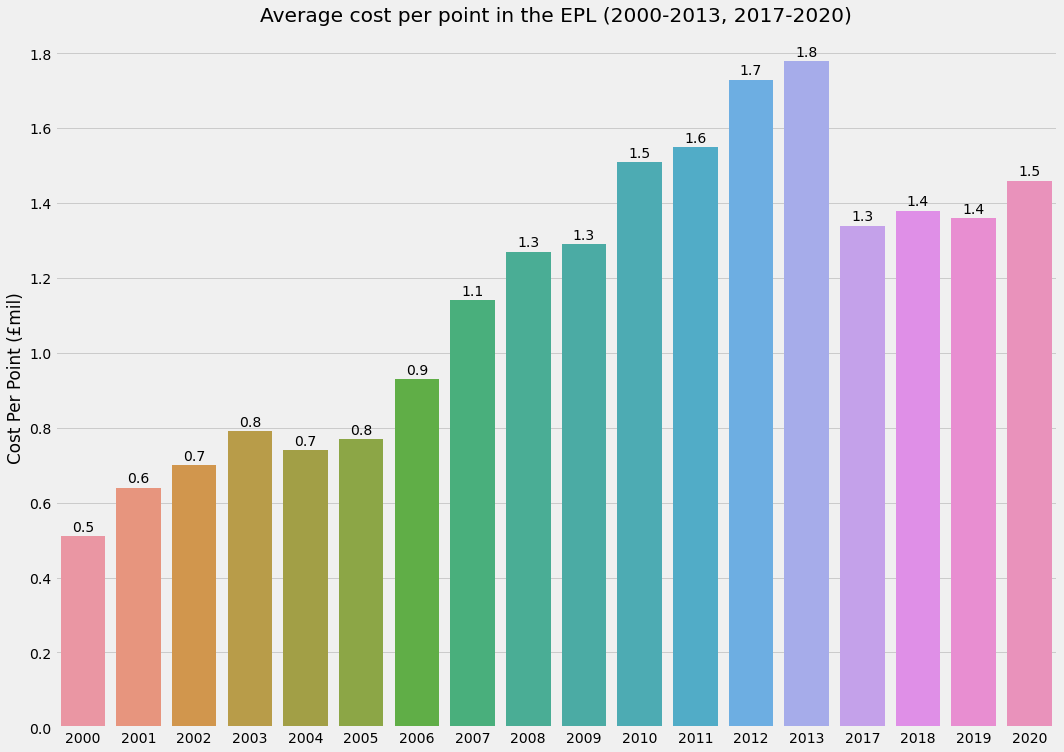

In [77]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = cost_per_point_df.index, y = 'Cost Per Point (£mil)', data = cost_per_point_df)

plt.yticks(np.arange(0, cost_per_point_df['Cost Per Point (£mil)'].max() + 0.2, 0.2))

plt.title('Average cost per point in the EPL (2000-2013, 2017-2020)')

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

> As of 2020-2021, Premier League clubs pay on average **£1.5 million per point**, triple what it was 20 years ago.

> Yet, as we can see from the charts above, whereas Bottom 3 teams are spending roughly the same amount of money per season as they were 20 years ago, Top 4 teams have doubled or even tripled their annual wage bills.  **The cost to compete has risen, while only a select few teams are able to rise with it.**

---
---

### Thanks for reading!